<a href="https://colab.research.google.com/github/samuelcjr/Data_Science/blob/master/Analisando_os_Dados_do_Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*por Samuel Carvalho*

---

# Análise dos Dados do Airbnb - *Nova Iorque*

<img alt="Analisando Airbnb" width="100%" height="15%"  src="https://image.freepik.com/free-vector/new-york-skyline-design-concept-with-statue-liberty-empire-state-building-chrysler-building-freed_1284-16572.jpg">

<h6><a href='https://www.freepik.com/free-photos-vectors/city'>City photo created by wirestock - www.freepik.com</a></h6>

<br>

Fundada em 2008, o [Airbnb](https://www.airbnb.com.br/) permite às pessoas alugar o todo ou parte de sua própria casa como uma forma de acomodação extra. A empresa fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação. Abrange mais de 500 mil anúncios em mais de 35.000 cidades e 192 países. Até o final de 2018 já havia hospedado **mais de 300 milhões de pessoas** ao redor do mundo, apesar da mesma não possuir sequer um único hotel !!

<center><img alt="Analisando Airbnb" width="10%" src="https://www.mochileiros.com/blog/wp-content/uploads/2017/10/airbnb_logo_detail-1024x382.png"></center>


Através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível obter uma grande quantidade de dados das principais cidades do mundo, com o intuito de serem utilizados em projetos e soluções de **Data Science**.

# Sobre a cidade de Nova Iorque

É a cidade mais populosa dos Estados Unidos e o centro da Região Metropolitana de Nova Iorque é uma das áreas mais populosas do mundo. É também a terceira cidade mais populosa da América, atrás de **São Paulo** e **Cidade do México**. A cidade exerce um impacto significativo sobre o comércio, finanças, mídia, arte, moda, pesquisa, tecnologia, educação e entretenimento de todo o planeta.

A cidade de Nova Iorque compreende 5 distritos situados no encontro do rio Hudson com o Oceano Atlântico. No centro da cidade fica **Manhattan**, um distrito com alta densidade demográfica que está entre os principais centros comerciais, financeiros e culturais do mundo.

<center><img alt="Analisando Airbnb" width="30%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/1024px-5_Boroughs_Labels_New_York_City_Map.svg.png"></center>

O **turismo** é uma indústria vital para a cidade de Nova Iorque, que tem testemunhado um crescente volume combinado de turistas nacionais e internacionais, recebendo o oitavo recorde anual consecutivo de aproximadamente **62,8 milhões de visitantes** em 2017.

Partindo dessa visão inicial, no *notebook* abaixo iremos analisar os dados brutos relativos à valores de hospedagem e obter informações adicionais sobre as locações na cidade.

## Obtenção dos Dados


In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame (df)
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv")

## Análise dos Dados


O **dicionário de variáveis** abaixo nos permite verificar como os dados estão estruturados:

* `id` - número de id gerado para identificar o imóvel
* `name` - descrição da propriedade anunciada
* `host_id` - número de id do proprietário
* `host_name` - nome do proprietário
* `neighbourhood_group` - distrito
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - tipo de quarto oferecido
* `price` - preço diário para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário
* `availability_365` - número de dias disponíveis dentro de 365 dias

<br><p>
Antes de iniciar qualquer análise, vamos verificar como está distribuído nosso conjunto de dados (ou *dataset*), analisando as 5 primeiras entradas.

In [172]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui ? Quais os tipos das variáveis ?**

Prosseguindo, iremos identificar a quantidade de entradas e os tipos de cada coluna do nosso *dataset*. O arquivo `listings.csv` baixado corresponde à uma versão resumida do AirBnB, sendo que neste [link](http://insideairbnb.com/get-the-data.html) é possível encontrar outros *datasets* com maior volume de informações.

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos das colunas presentes no dataset
display(df.dtypes)

Entradas:	 50246
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset* ?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [5]:
# listar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100)

reviews_per_month                 21.951996
last_review                       21.951996
name                               0.035824
host_name                          0.021892
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

* As variáveis `reviews_per_month` e `last_review` possuem quase 22% de seus valores faltantes.
* As variáveis `name` e `host_name` possuem 0,035% e 0,022% respectivamente de valores faltantes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

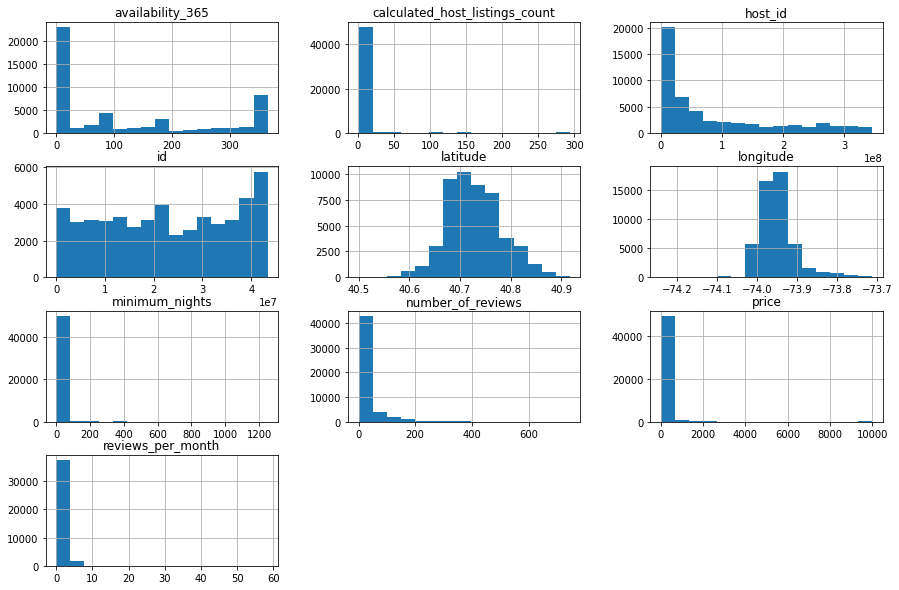

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Em estatística, *outlier* (valor atípico) é uma observação que apresenta um grande afastamento dos demais valores da série ou que é inconsistente. A existência de *outliers* implica, tipicamente, em prejuízos à interpretação dos resultados dos testes estatísticos aplicados às amostras.

No histograma acima, é possível verificar indícios da presença de *outliers*. Observe por exemplo as variáveis `price` e `minimum_nights`.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [66]:
# ver o resumo estatístico das variáveis numéricas (usando o método Describe)
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


Com base na estatística acima, podemos notar algumas situações:

* O preço mínimo (`price`) aparece como 0 (zero). Na prática, ter um valor zero no preço significa que há aluguel de graça (o que não é verdade)
* O preço máximo (`price`) está em 10.000 dólares. Em se tratando de locação pelo AirBnB nos parece um valor fora da realidade.
* O valor máximo (max) do "mínimo número de noites (`minimum_nights`)" para poder se hospedar aparece como 1250 (não faz sentido). Certamente um erro no cadastro, mas que compromete as análises.

#### Boxplot para minimum_nights

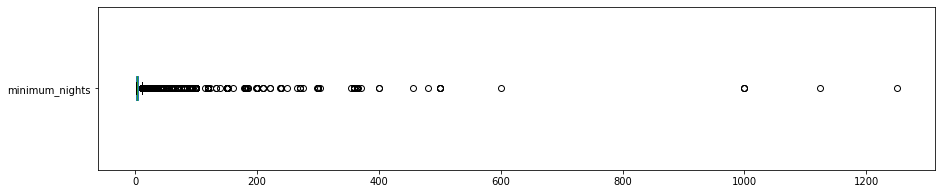

minimum_nights: valores acima de 30:
772 entradas
1.5364%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

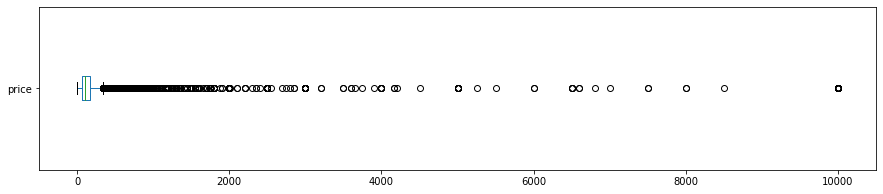


price: valores acima de 1000 dólares
323 entradas
0.6428%


In [124]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 dólares para price
print("\nprice: valores acima de 1000 dólares")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

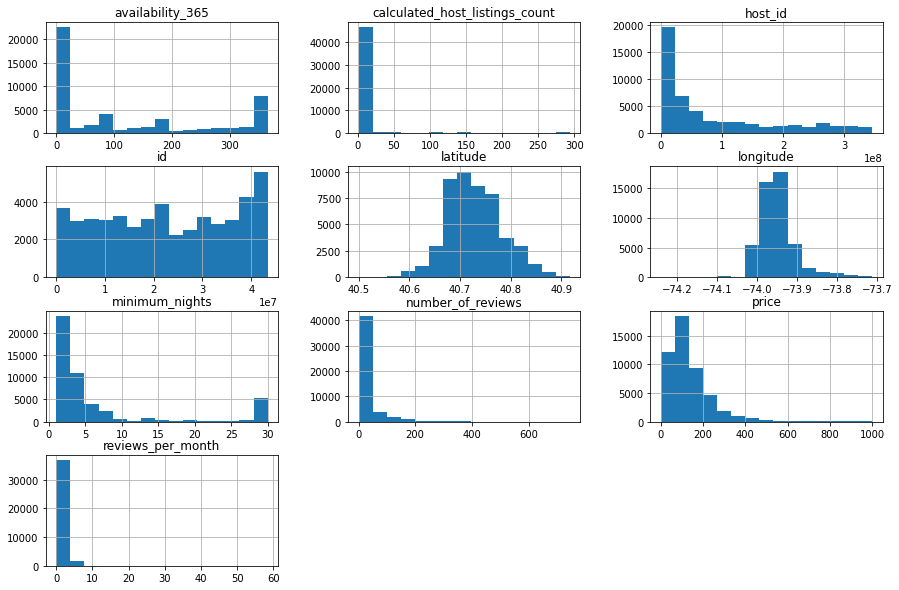

In [159]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Verificamos acima que as variáveis `price` e `minimum_nights` agora possuem uma distribuição mais real. Usando novamente o método describe() temos a seguinte estatística:

In [160]:
# ver o resumo estatístico das variáveis numéricas, agora sem os *outliers*
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,49180.000000,49180.000000,49180.000000,38636.000000,49180.000000,49180.000000
mean,139.022326,6.377694,24.716836,1.098523,7.084242,120.445588
std,116.743092,9.035024,48.878602,1.430323,28.495848,140.154287
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,100.000000,3.000000,5.000000,0.520000,1.000000,63.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,245.000000
max,1000.000000,30.000000,746.000000,58.430000,294.000000,365.000000


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Há opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [161]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    25371
Private room       22259
Shared room         1118
Hotel room           432
Name: room_type, dtype: int64

In [176]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0] *100)

Private room       52.239202
Entire home/apt    44.494339
Shared room         2.619444
Hotel room          0.647015
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Nova Iorque ?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [163]:
# ver preços por bairros, na média (mean)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Country Club         1000.000000
Fort Wadsworth        700.000000
Woodrow               700.000000
Willowbrook           309.000000
Tribeca               292.102151
Flatiron District     261.783784
Jamaica Estates       257.000000
NoHo                  253.792683
Midtown               253.284204
Neponsit              249.666667
Name: price, dtype: float64

Nesse momento é importante ter uma certa atenção com os resultados, pois se não for feita uma análise mais cuidadosa entende-se que "Country Club" é o local mais caro de Nova Iorque para se hospedar (levando em consideração que agora temos um preço máximo de 1000 dólares)

Para que esta informação se confirme, é necessário que tenhamos uma quantidade expressiva de amostras relacionadas à esse local:

In [164]:
# verificar a quantidade de entradas para um determinado valor (no caso, "Country Club")
df_clean[df_clean['neighbourhood'] == "Country Club"].shape

(1, 16)

Há apenas um único registro relacionado à Country Club, ou seja, não podemos afirmar que esse é o bairro mais caro tendo somente uma locação até o momento !

Se olharmos novamente o histograma de preço, percebe-se que uma quantidade significativa de amostras encontra-se até a faixa dos 200 dólares:

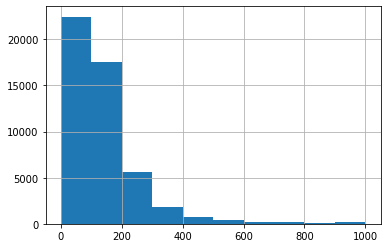

In [165]:
# imprimir o histograma da variável 'price'
df_clean['price'].hist()

Neste caso, é interessante realizar uma nova remoção de *outliners* para termos uma massa de dados mais confiável e com maior amostragem:

In [0]:
# remover *outliers* acima de 200 dólares
df_clean.drop(df_clean[df_clean.price > 200].index, axis=0, inplace=True)

Agora vamos verificar novamente como ficaram as médias de valores nos bairros:

In [177]:
# ver preços por bairros, na média (mean)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Belle Harbor         200.000000
Neponsit             199.500000
Breezy Point         189.000000
Huguenot             180.000000
Lighthouse Hill      157.500000
Murray Hill          150.695266
West Village         150.581560
DUMBO                148.166667
Tribeca              147.987179
Greenwich Village    142.637209
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

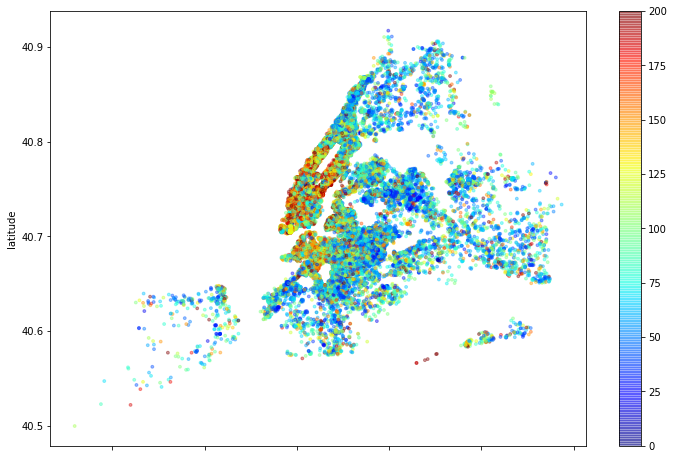

In [178]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [169]:
# ver a média da coluna "minimum_nights"
print("Média do 'mínimo número de noites' para se hospedar em Nova Iorque:",int(df_clean['minimum_nights'].mean()))
print("(Considerando um valor máximo de 200 dólares)")

Média do 'mínimo número de noites' para se hospedar em Nova Iorque: 6
(Considerando um valor máximo de 200 dólares)


### **Q8. Quais distritos tem maior número de locações ?**

Aqui vamos utilizar nosso dataset original (df)

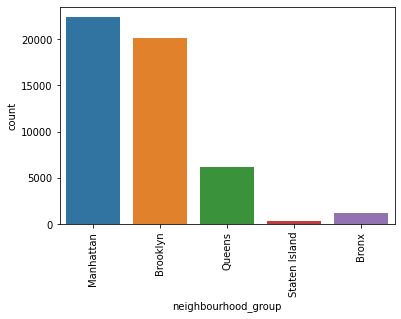

In [190]:
# verificar número de locações por distrito
df['neighbourhood_group'].value_counts()
sns.countplot(df['neighbourhood_group'])
plt.xticks(rotation=90,horizontalalignment="center");

## Conclusões


Após uma análise inicial do *dataset* pudemos verificar que existem valores extremos que podem afetar a interpretação dos resultados.

Mesmo com uma base de dados na versão resumida, constata-se pelo gráfico de latitudes/longitudes que a região de *Manhattan* é a mais cara para se hospedar. Porém com valores acima da média, ainda é o local mais procurado de Nova Iorque.

Apenas 0,6% de **quartos de hotel** estão disponíveis, o que pode significar uma boa oportunidade para investidores em adquirir esse tipo de imóvel.

Hospedar-se no distrito do *Queens* pode ser uma boa relação custo/benefício, por estar situado entre o aeroporto JFK e a ilha de Manhattan.